COLUMN NAMES:
 Index(['id', 'comment', 'User  id', 'Photo id', 'created Timestamp',
       'posted date', 'emoji used', 'Hashtags used count'],
      dtype='object') 

   id                 comment  User  id  Photo id created Timestamp  \
0   1         unde at dolorem         2         1  13-04-2023 08:04   
1   2         quae ea ducimus         3         1  13-04-2023 08:04   
2   3      alias a voluptatum         5         1  13-04-2023 08:04   
3   4    facere suscipit sunt        14         1  13-04-2023 08:04   
4   5  totam eligendi quaerat        17         1  13-04-2023 08:04   

  posted date emoji used  Hashtags used count  
0    April 14        yes                    1  
1    April 14         no                    2  
2    April 14         no                    4  
3    April 14        yes                    2  
4    April 14        yes                    1  


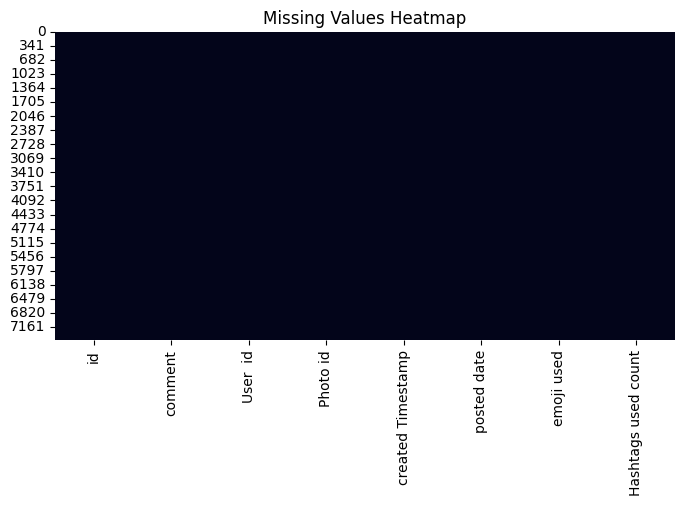

Categorical Columns: ['comment', 'created Timestamp', 'posted date', 'emoji used']
Numeric Columns: ['id', 'User  id', 'Photo id', 'Hashtags used count']


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/kaggle/input/commentdata/comments.csv")

print("COLUMN NAMES:\n", df.columns, "\n")
print(df.head())

plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

categorical_cols = df.select_dtypes(include=['object']).columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Columns:", list(categorical_cols))
print("Numeric Columns:", list(numeric_cols))

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Bar Chart of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col].dropna(), bins=20)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col].dropna())
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

if len(numeric_cols) > 1:
    plt.figure(figsize=(8,6))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()

if len(numeric_cols) >= 2:
    for i in range(len(numeric_cols)-1):
        plt.figure(figsize=(6,4))
        plt.scatter(df[numeric_cols[i]], df[numeric_cols[i+1]])
        plt.title(f"{numeric_cols[i]} vs {numeric_cols[i+1]}")
        plt.xlabel(numeric_cols[i])
        plt.ylabel(numeric_cols[i+1])
        plt.tight_layout()
        plt.show()
